<a href="https://colab.research.google.com/github/romulokps/testesPCR/blob/main/resultadosNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

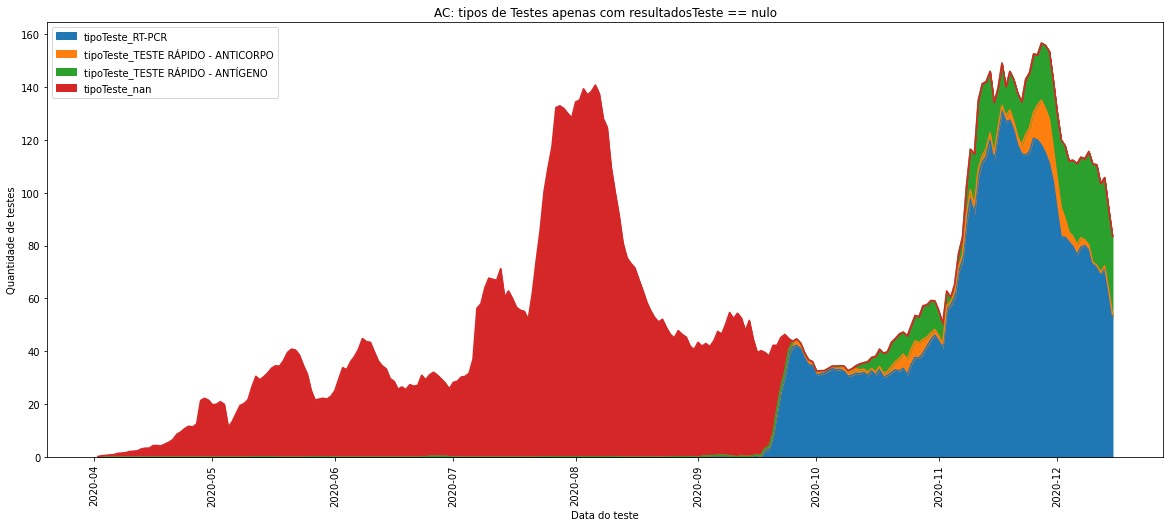

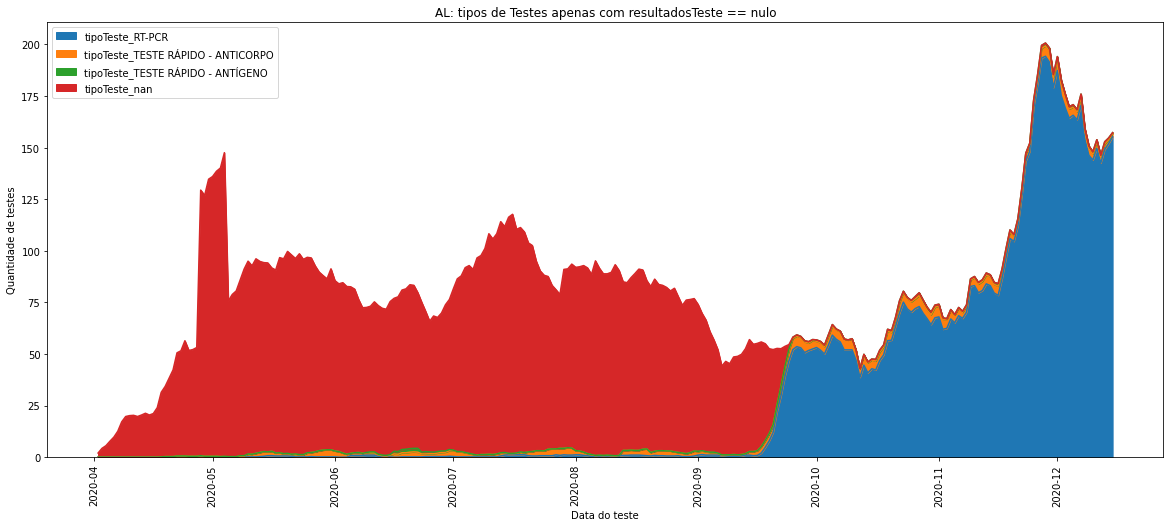

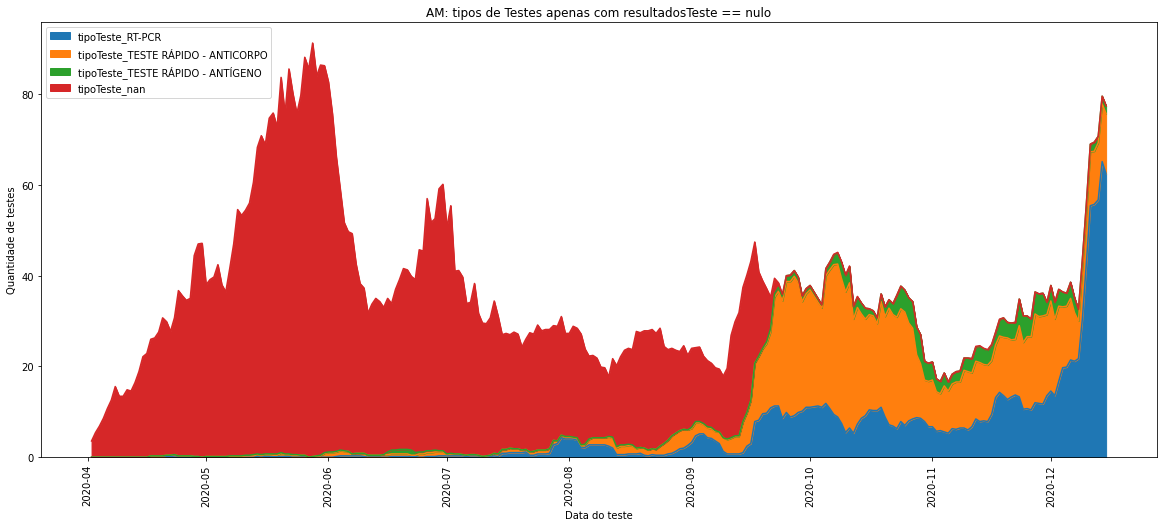

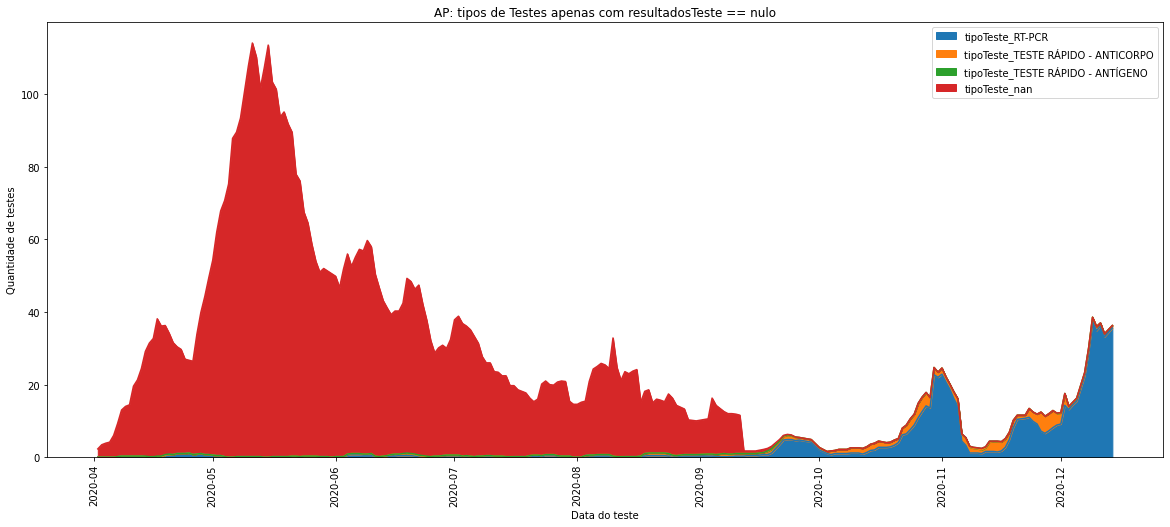

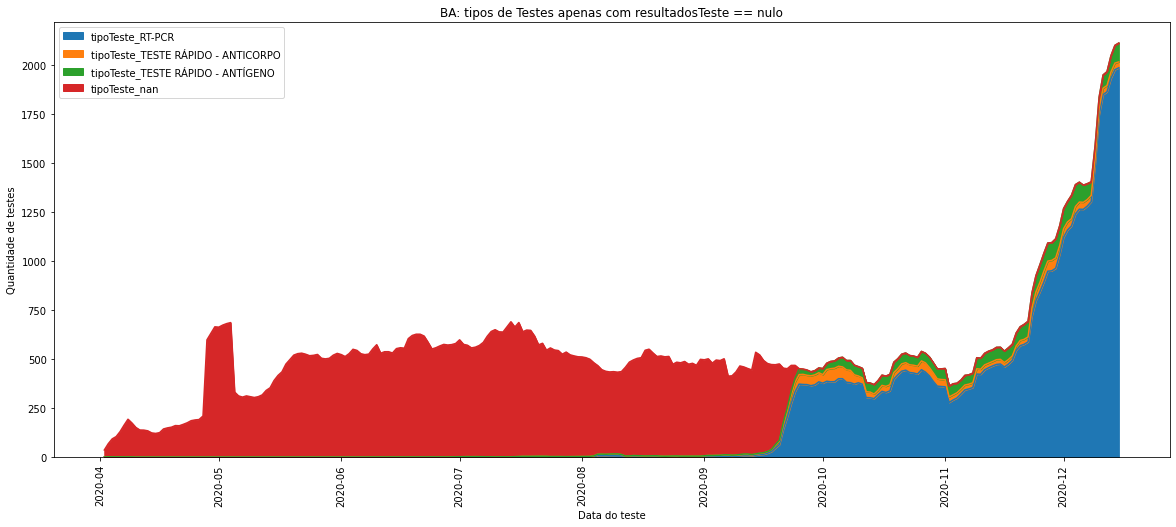

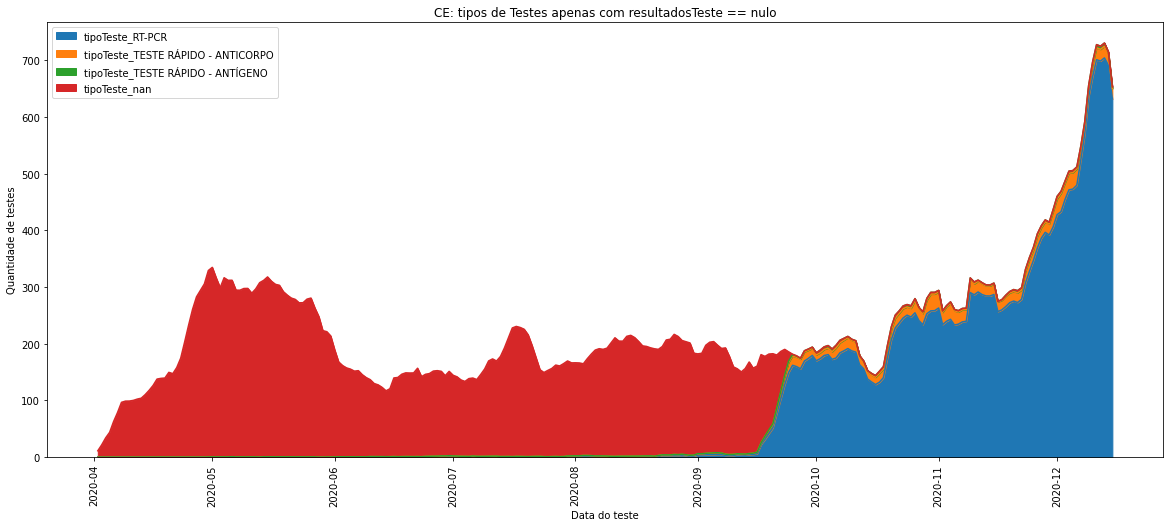

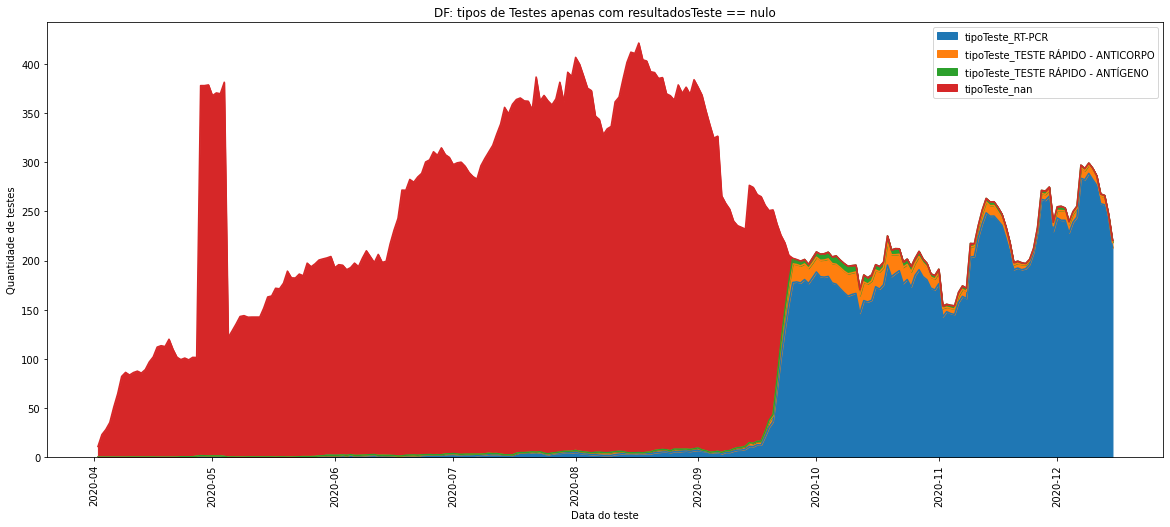

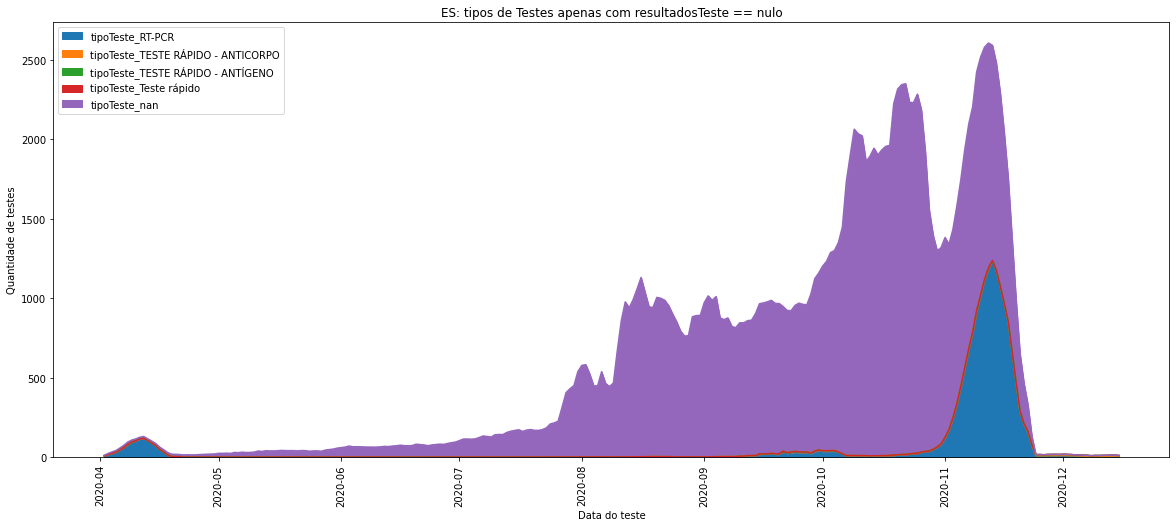

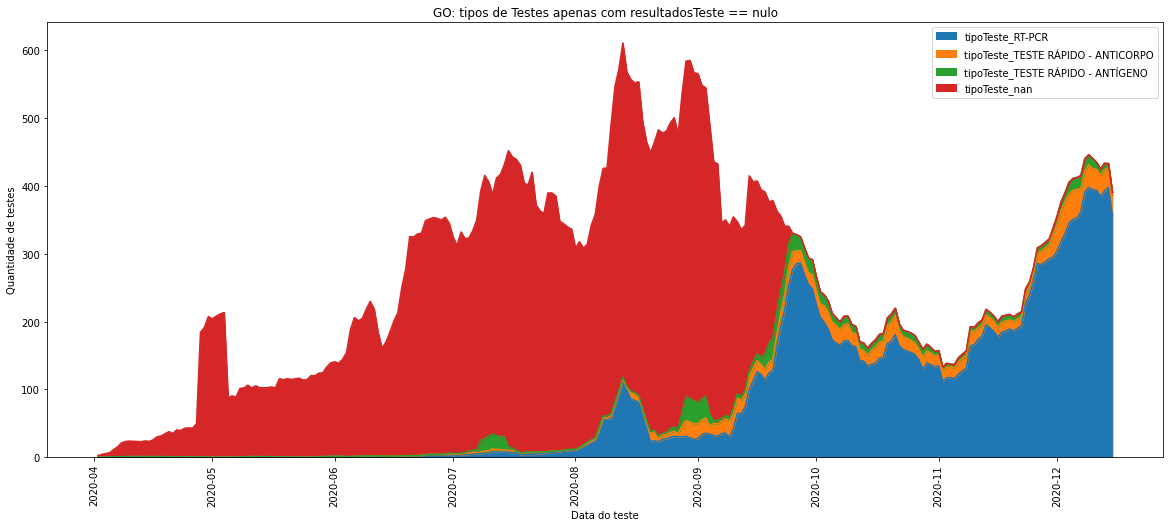

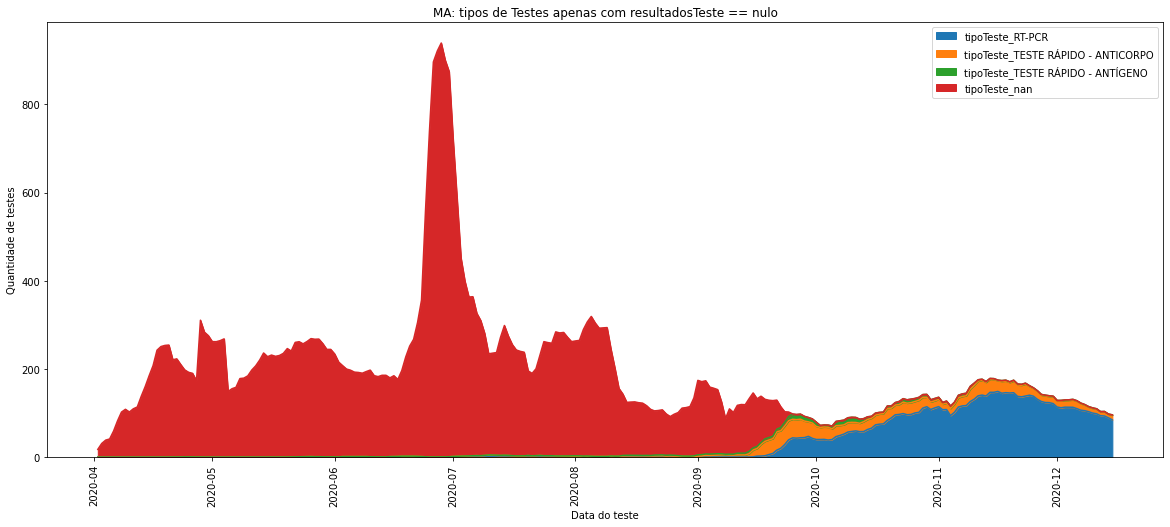

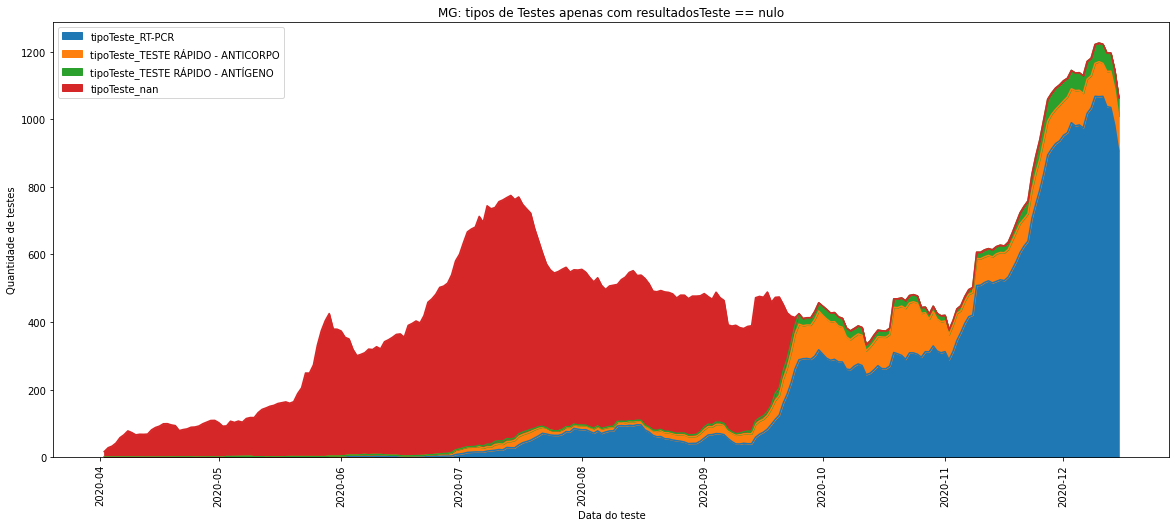

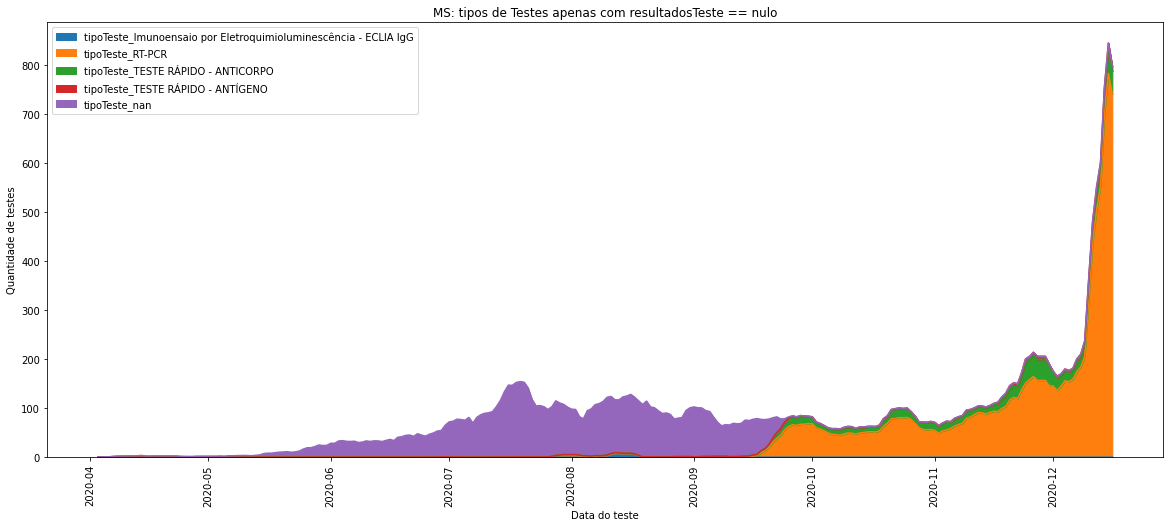

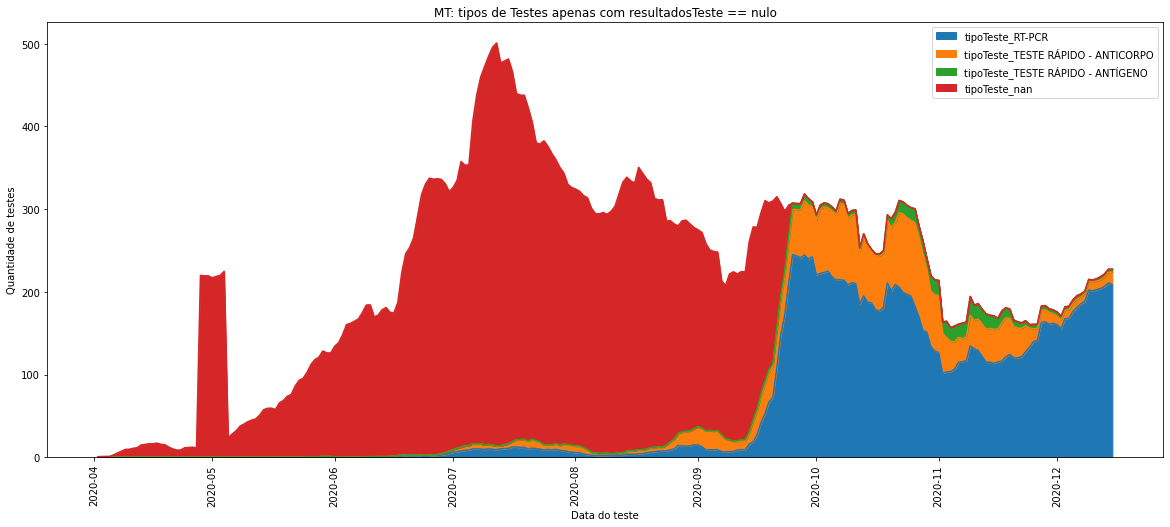

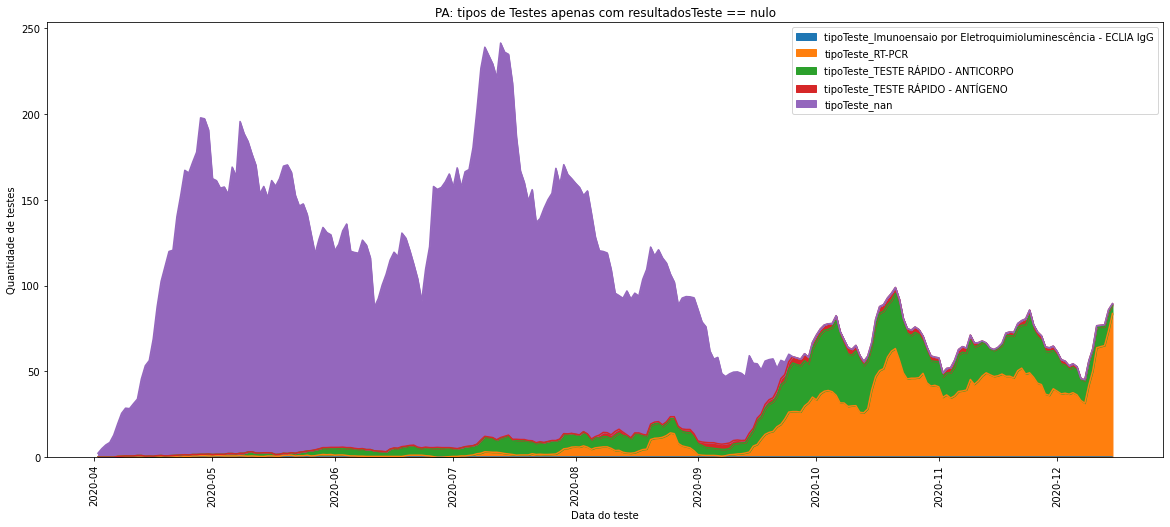

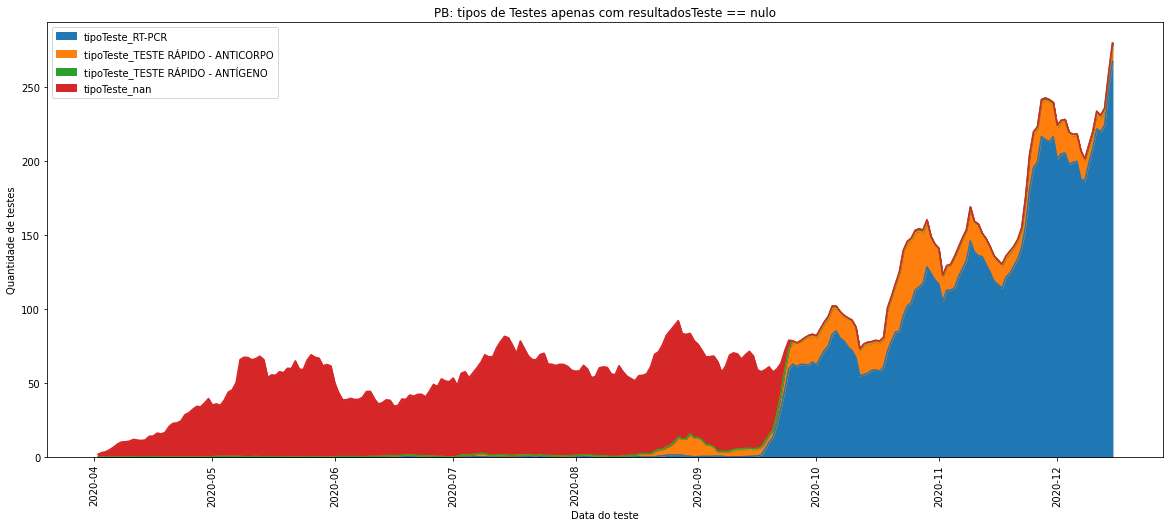

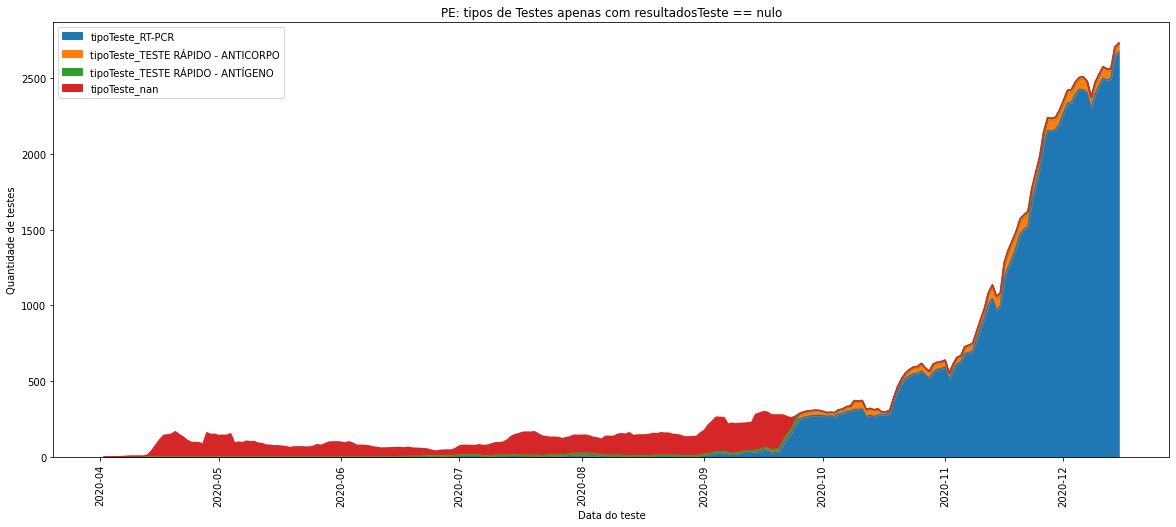

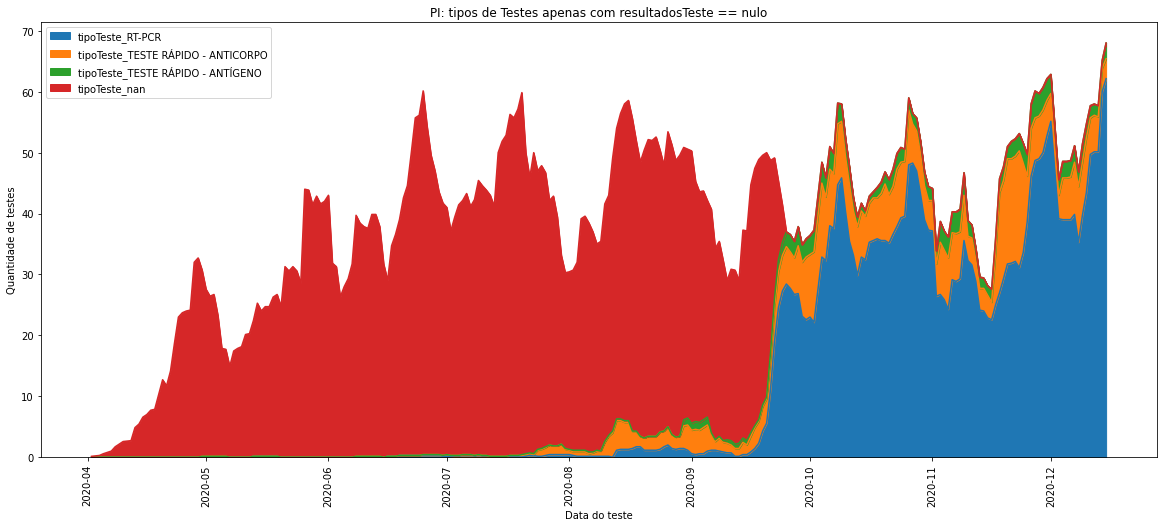

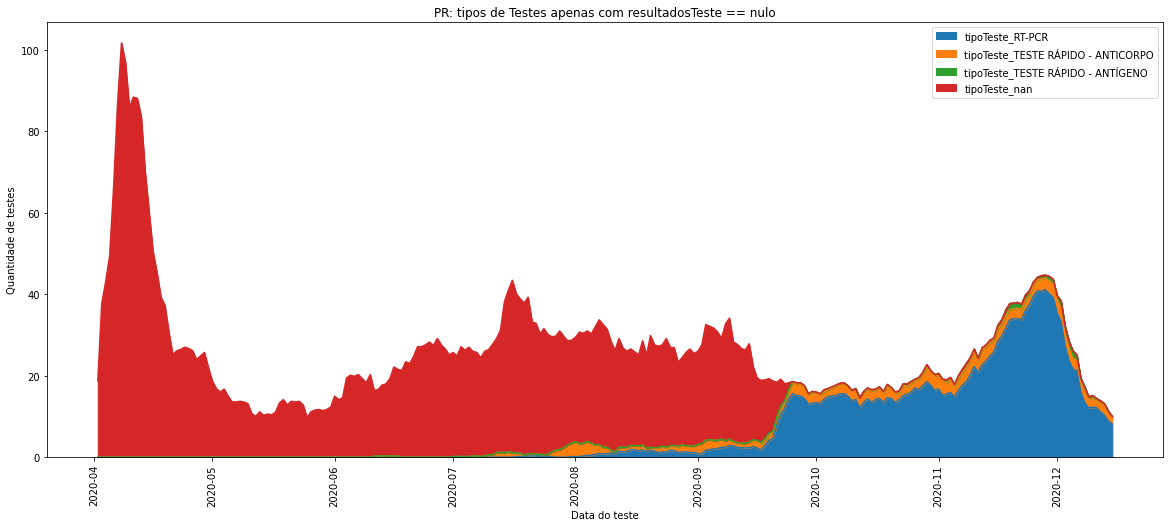

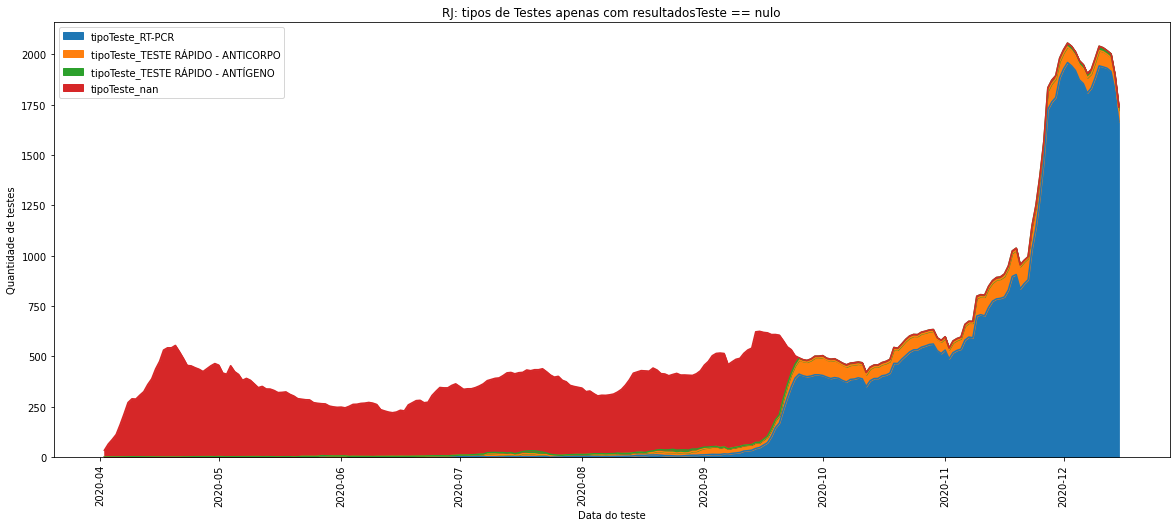

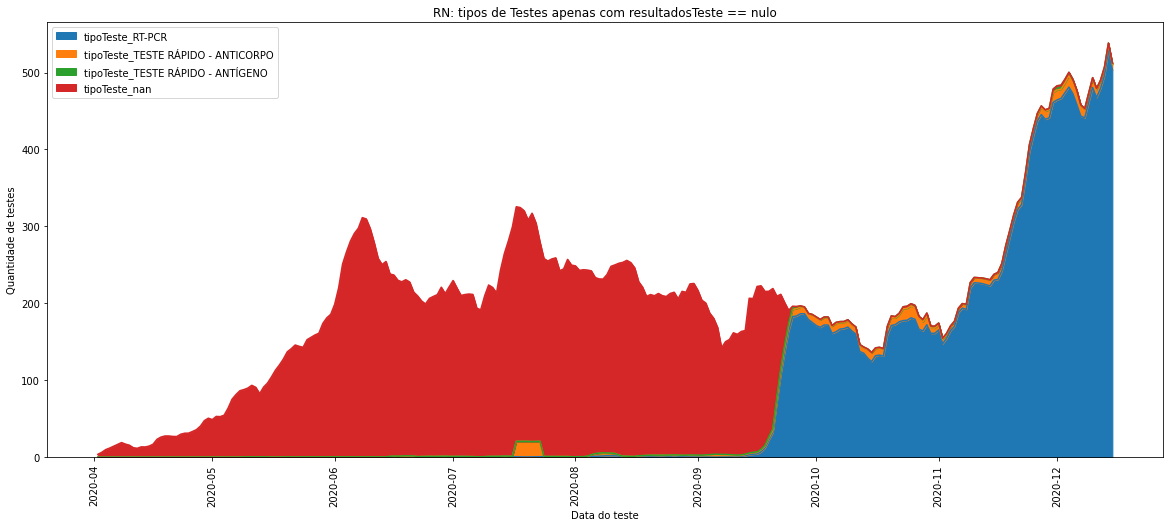

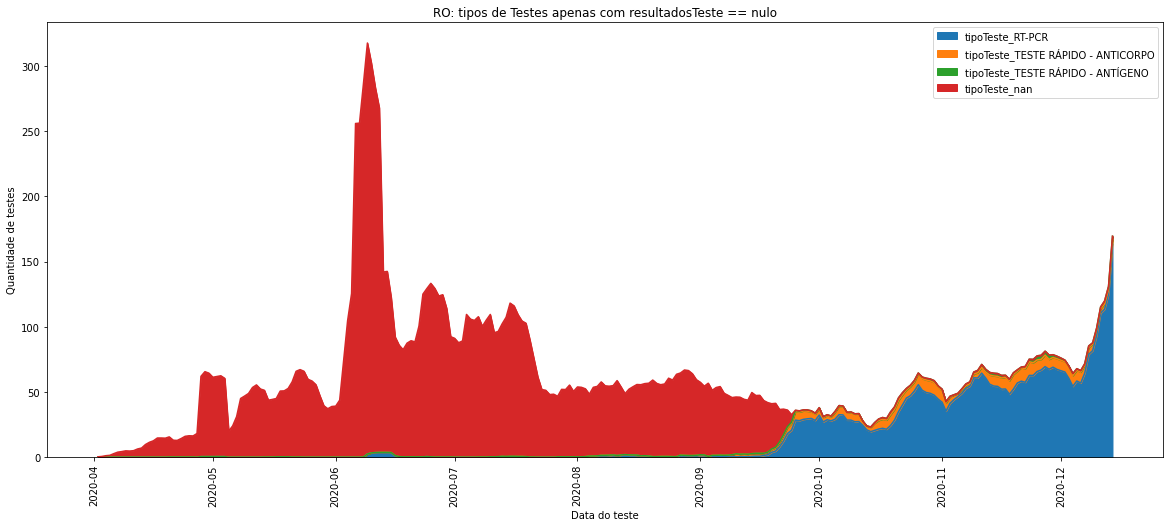

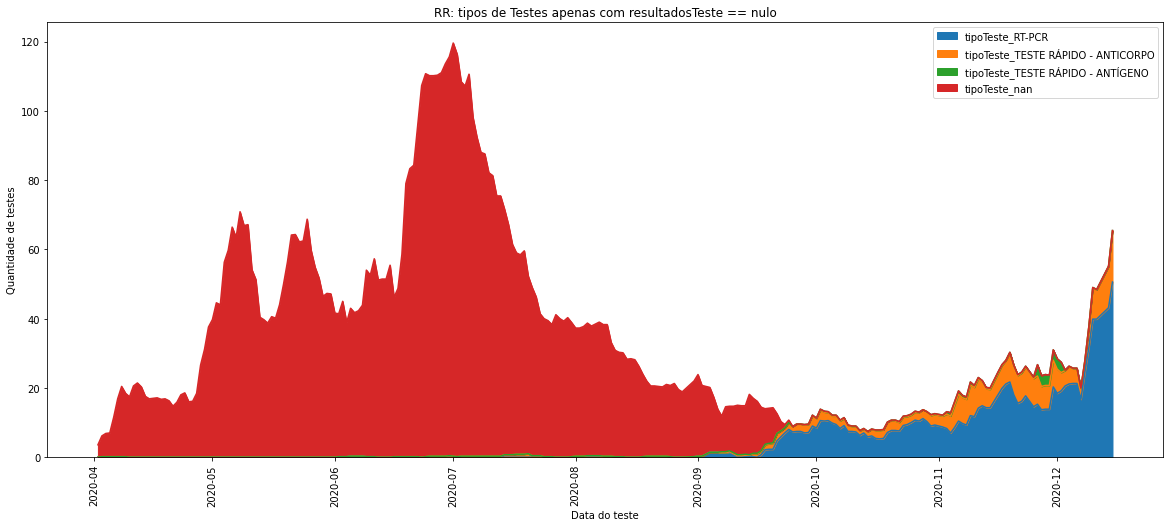

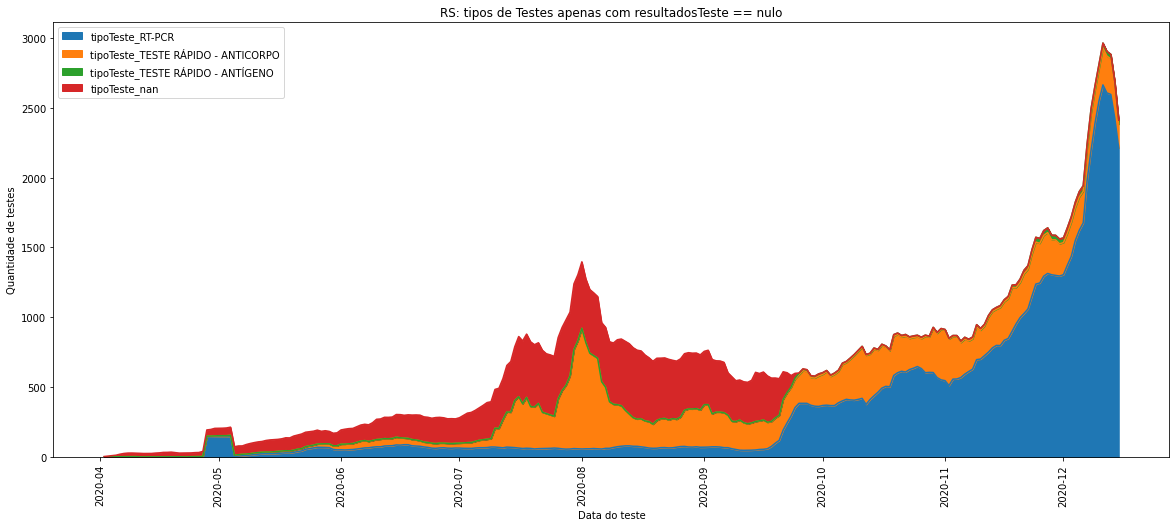

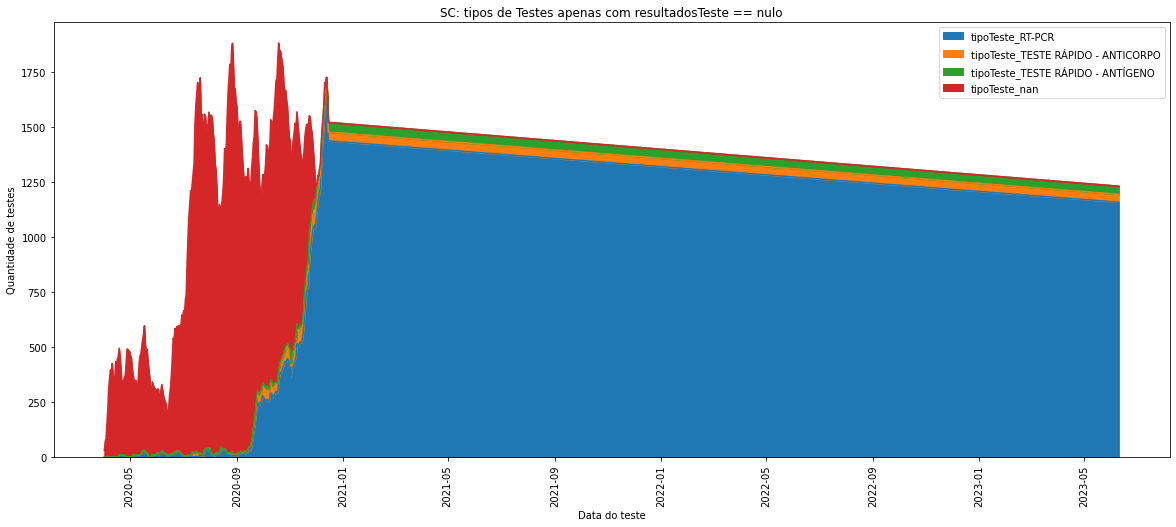

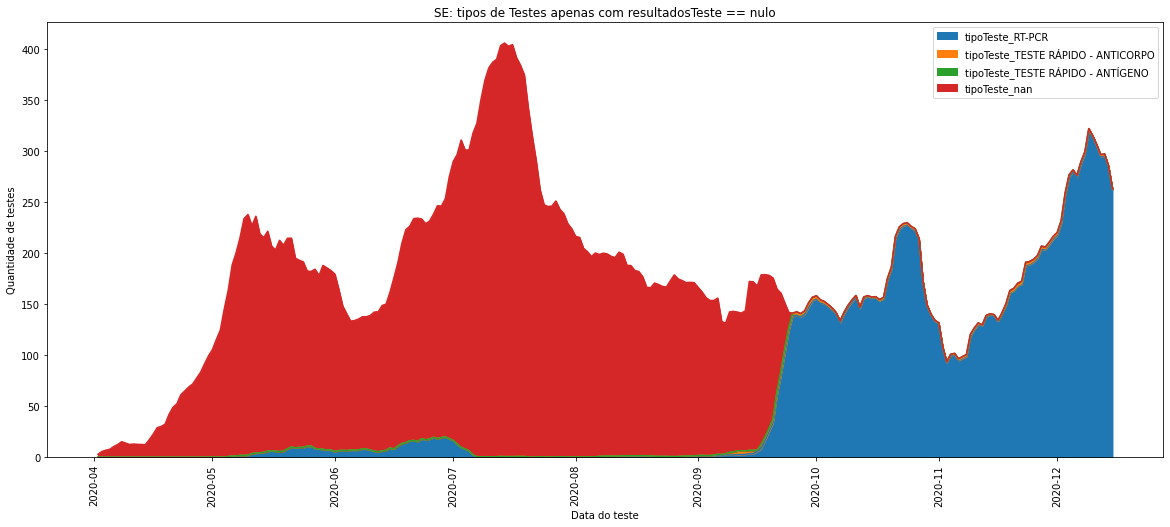

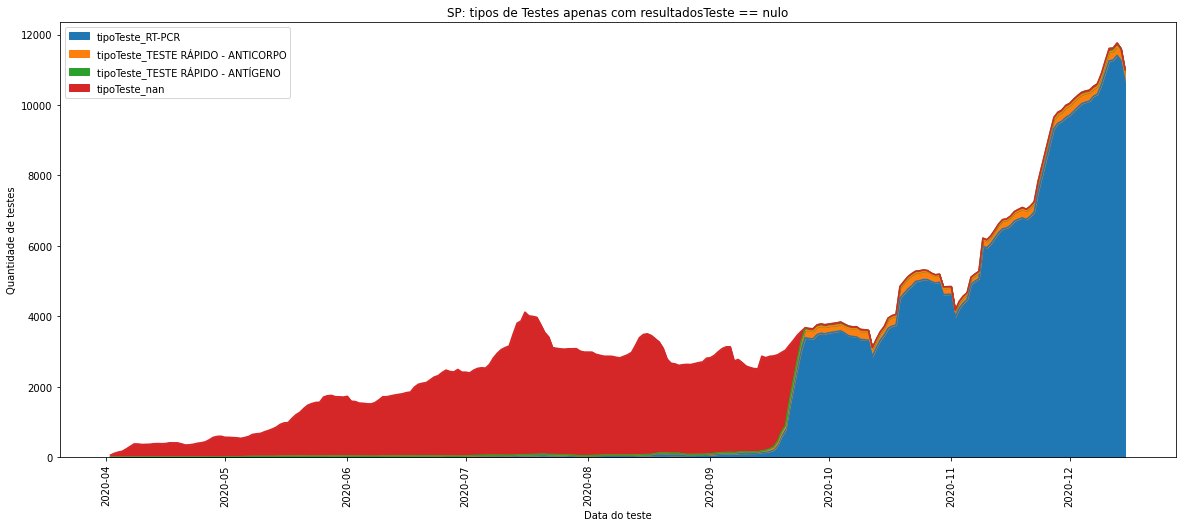

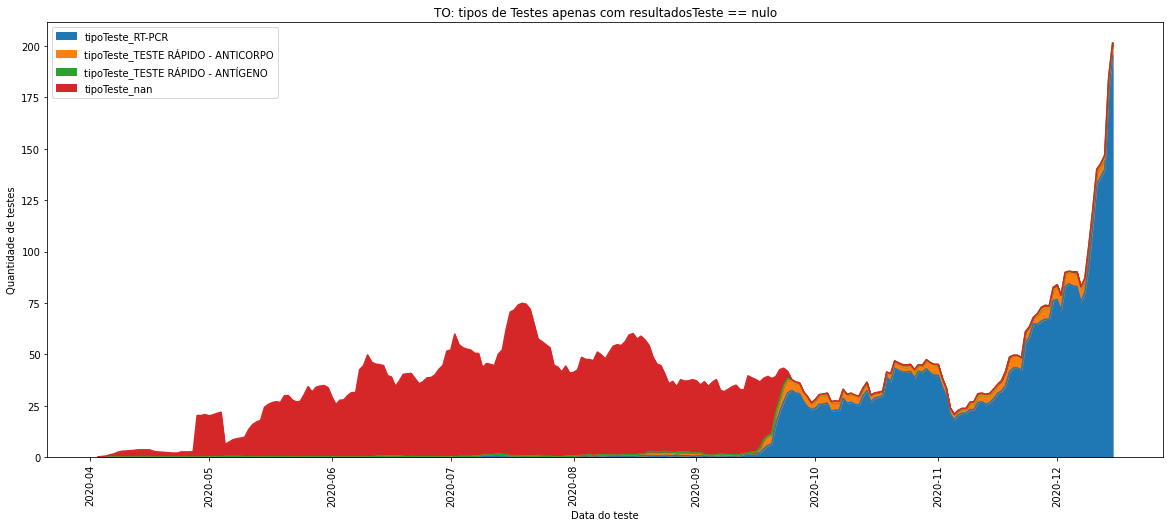

In [3]:
import pandas as pd
import csv
from datetime import datetime
from scipy import stats
import numpy as np
import os

caminho = '/content/drive/My Drive/dados/estados 2020-12-18/'
arquivos = [f for f in os.listdir(caminho) if os.path.isfile(os.path.join(caminho, f))]
arquivos.sort()
 
def outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 13).all(axis=1)
    df = df[filtered_entries]
    return(df)
def mediaMovel(df, janela):
    for i in range(len(df.columns)):
      df[df.columns[i]] = df[df.columns[i]].rolling(min_periods=1, window=janela).sum()/janela
    return(df)
 
for i in arquivos:
    colunas = ['dataTeste', 'tipoTeste', 'resultadoTeste']
    df = pd.read_csv(caminho + i, low_memory = False, usecols = colunas)
    #df = df[['dataTeste', 'tipoTeste', 'resultadoTeste']]
    df['dataTeste'] = pd.to_datetime(df['dataTeste'],errors = 'coerce').dt.date
    df = df[df['dataTeste'] > datetime.strptime('2020-04-01', '%Y-%m-%d').date()]
    df2 = df
    df2 = df2.replace(np.nan, "nan")
 
    
    resultado = df2[df2['resultadoTeste'] == 'nan']
    #resultado = resultado[resultado['tipoTeste'] == 'RT-PCR']
    resultado = resultado[['dataTeste', 'tipoTeste']]
    resultado = pd.get_dummies(resultado, columns=['tipoTeste'])
    resultado = resultado.groupby('dataTeste').sum()
    a = resultado.copy()
    #tipo = df2
    #tira os outliers
    resultado = outliers(resultado)
    #Media movel
    resultado = mediaMovel(resultado, 7)
 
 
    #if (i == 0):
    #  total = fe
    #else:
    #  total = total + fe   
    ax = resultado.plot.area(rot=90, figsize = (20,8))
    ax.set_title(i + ": tipos de Testes apenas com resultadosTeste == nulo")
    ax.set_xlabel("Data do teste")
    ax.set_ylabel("Quantidade de testes")
    ax.figure.savefig(caminho + "img/"+ i + '.png')

    #resultado = df2[df2['tipoTeste'] == 'RT-PCR']
    #resultado = resultado[['dataTeste', 'resultadoTeste']]
    #resultado = pd.get_dummies(resultado, columns=['resultadoTeste'])
    #resultado = resultado.groupby('dataTeste').sum()
    ##tipo = df2
    ##tira os outliers
    #resultado = outliers(resultado)
    ##Media movel
    #resultado = mediaMovel(resultado, 7)
    ##plota
    #ax = resultado.plot.area(rot=90, figsize = (20,8))
    #ax.set_title(i + ": resultados de Testes apenas para testes RT-PCR")
    #ax.set_xlabel("Data do teste")
    #ax.set_ylabel("Quantidade de testes")
    #ax.figure.savefig(caminho + "img/"+ i + 'pcr.png')
    


    #taxai.plot(rot=90, secondary_y=True)